# Práctica 1: Introducción al entorno de desarrollo
## Aprendizaje Automático I

Explicar que se va a utilizar Python como lenguaje de programación y en concreto en los equipos del laboratorio tiene instalado el entorno Anaconda que incluye no solo el intérprete Python sino también aquellos paquetes que se usan más habitualmente en el problemas de Ciencia de Datos. 

El desarrollo en Python se puede hacer mediante scripts que son documentos en texto plano que son ejecutados por el intérprete de Python normalmente desde un terminal. Otra posibilidad es mediante los cuadernos Jupyter que se ejecutan en un navegador y puede contener tanto código como texto o gráficos utilizando el lenguaje de marcado Markdown.

Además del intérprete y los paquetes también se incluye terminales desde la que ejecutar scripts de Python y un navegador Jupyter para desarrollar y ejecutar cuadernos de notas Jupyter.

Además de utilizar las herramientas que proporcionan en entorno Anaconda se pueden utilizar otras aplicaciones para desarrollar tanto los scripts como cuadernos Jupyter. Una de estas opciones es Visual Studio Code que es un editor de código abierto que mediante extensiones permite editar código en Python además de editar y ejecutar cuadernos Jupyter. La ventaja que posee es que tiene resaltado de sintaxis y autocompletado así como ayuda de las funciones de los paquetes.

Las librerías de las que haremos uso en esta materia son:
- Scikit-learn: Esta librería implementa modelos de aprendizaje automático tanto supervisado como no supervisado, además de métodos para preprocesamiento de
datos, selección y evaluación de modelos entre otros.
- Pandas: Es una librería orientada al análisis de datos que facilita las tareas en conjuntos de datos estructurados organizado como filas y columnas, de forma similar a una hoja de cálculo o tabla de una base de datos relacional. Las dos estructuras de datos básicas de Pandas son las Series y Dataframe para el manejo de datos unidimensionales y bidimensionales, respectivamente.
- Numpy: Es una librería que proporciona la capacidad de computación numérica a Python así como estructuras de datos multidimensionales (matrices). El tipo de datos principal en Numpy es el ndarray que a diferencia de los dataframe de Pandas, solo pueden contener datos del mismo tipo, y la librería proporciona métodos para operar de forma eficiente con los ndarray.
- Matplotlib: Esta librería permite crear visualizaciones en python tanto estáticas como animadas en Python. Además es la base de otras librerías como es Seaborn.

## Librería Pandas

Pandas es una librería que permite análisis de datos y herramientas para procesarlos. El uso que tendrá en la asignatura será básicamente como entrada y salida de datos, ya que soporta gran cantidad de formatos de ficheros como el csv o archivos excel.

A la hora de importarla es norma usar como pd

    # En la consola -> pip install pandas

    # import pandas as pd



### Ejemplo de lectura de archivos csv y excel

In [87]:
import pandas as pd
import os
# 
FOLDER = 'data/'
CHOCES_1 = os.path.join(FOLDER, 'coches.csv')
CHOCES_2 = os.path.join(FOLDER, 'coches_2.csv')

df = pd.read_csv(CHOCES_1)
df

,matrícula,marca,modelo,año,kms,precio
0,ABC123,Toyota,Camry,2019,25153,5300
1,XYZ456,Honda,Accord,2018,30278,9000
2,DEF789,Ford,Fusion,2020,22456,4000
3,GHI012,Chevrolet,Malibu,2017,34987,7500
4,JKL345,Nissan,Altima,2016,38163,3200


El resultado de la lectura es un Dataframe que es la principal estructura de datos en Pandas. Se corresponde con una estructura de datos bidimensional compuesta por filas y columnas. A diferencia de las matrices en otros lenguajes de programación, un Dataframe puede contener en cada columna un tipo diferente de datos, similar a una hoja de cálculo. Además el acceso a los elementos se puede hacer tanto mediante el índice de la fila y columna (similar a C) o mediante el índice y nombre de la columna.

Una vez leido el archivo es conveniente comprobar el resultado y para ello se pueden mostrar las primeras líneas usando la función head. Por defecto muestra las 5 primeras pero se puede indicar el número a mostrar como argumento a la función.

El acceso a las columnas se hace mediante el nombre de la misma y si son varias columnas se pasa una lista.

In [88]:
df.head()

,matrícula,marca,modelo,año,kms,precio
0,ABC123,Toyota,Camry,2019,25153,5300
1,XYZ456,Honda,Accord,2018,30278,9000
2,DEF789,Ford,Fusion,2020,22456,4000
3,GHI012,Chevrolet,Malibu,2017,34987,7500
4,JKL345,Nissan,Altima,2016,38163,3200


In [89]:
# para cuando tengamos un dataframe muy grande y queramos ver solo las primeras un par de filas
df.head(3)

,matrícula,marca,modelo,año,kms,precio
0,ABC123,Toyota,Camry,2019,25153,5300
1,XYZ456,Honda,Accord,2018,30278,9000
2,DEF789,Ford,Fusion,2020,22456,4000


### Acceso a los elementos del Dataframe

In [90]:
df['marca'] # como si fuera un diccionario

0       Toyota
1        Honda
2         Ford
3    Chevrolet
4       Nissan
Name: marca, dtype: object

In [91]:
df[['marca','modelo']]

,marca,modelo
0,Toyota,Camry
1,Honda,Accord
2,Ford,Fusion
3,Chevrolet,Malibu
4,Nissan,Altima


Si se accede a una única columna el resultado es una serie mientras que si se accede a varias columnas el resultado es otro dataframe.

El acceso a las filas se puede hacer mediante el índice de la fila comenzando en 0 usando la función iloc o mediante el valor del índice de la fila, que puede ser numérico o alfanumérico, con la función loc. Por defecto cuando se lee un archivo csv se crea como índice una columna con números del 0 al número de columnas - 1, por lo que el acceso es igual con ambas funciones. El resultado es una serie si se accede a una única columna o un dataframe si se accede a varias con iloc. En este último caso se pueden utilizar rangos con los : o varias filas no consecutivas pasando una lista.

In [92]:
df.iloc[1] # para acceder a una fila con el indice numerico

matrícula    XYZ456
marca         Honda
modelo       Accord
año            2018
kms           30278
precio         9000
Name: 1, dtype: object

In [93]:
df.loc[0] # para acceder a una fila con el índice alfanumérico

matrícula    ABC123
marca        Toyota
modelo        Camry
año            2019
kms           25153
precio         5300
Name: 0, dtype: object

In [94]:
df.iloc[1:3] # todo lo que puedes hacer con una lista de python

,matrícula,marca,modelo,año,kms,precio
1,XYZ456,Honda,Accord,2018,30278,9000
2,DEF789,Ford,Fusion,2020,22456,4000


Para acceder a un rango de filas o columnas contiguas se puede usar el operador :, y si no son contiguas, se pasa en una lista los índices.

In [95]:
df.iloc[:, 3]

0    2019
1    2018
2    2020
3    2017
4    2016
Name: año, dtype: int64

In [96]:
df.iloc[[0,2,4]]

,matrícula,marca,modelo,año,kms,precio
0,ABC123,Toyota,Camry,2019,25153,5300
2,DEF789,Ford,Fusion,2020,22456,4000
4,JKL345,Nissan,Altima,2016,38163,3200


Si se decide que una de las columnas de archivo sea utilizada como índice se puede o bien indicar al leerlo con el argumento "index_col" o una vez cargado, utilizar el método set_index para indicar la columna que se debe utilizar como índice

In [97]:
df = pd.read_csv(CHOCES_1, index_col='matrícula')
df # OJO! cuidado con los indices, si no son únicos, se pueden perder datos

,marca,modelo,año,kms,precio
matrícula,,,,,
ABC123,Toyota,Camry,2019,25153,5300
XYZ456,Honda,Accord,2018,30278,9000
DEF789,Ford,Fusion,2020,22456,4000
GHI012,Chevrolet,Malibu,2017,34987,7500
JKL345,Nissan,Altima,2016,38163,3200


In [98]:
df.loc['ABC123']

marca     Toyota
modelo     Camry
año         2019
kms        25153
precio      5300
Name: ABC123, dtype: object

In [99]:
df.loc['DEF789']

marca       Ford
modelo    Fusion
año         2020
kms        22456
precio      4000
Name: DEF789, dtype: object

In [100]:
df.loc[['ABC123', 'JKL345']]

,marca,modelo,año,kms,precio
matrícula,,,,,
ABC123,Toyota,Camry,2019,25153,5300
JKL345,Nissan,Altima,2016,38163,3200


In [101]:
df1 = pd.read_csv(CHOCES_1)
df1

,matrícula,marca,modelo,año,kms,precio
0,ABC123,Toyota,Camry,2019,25153,5300
1,XYZ456,Honda,Accord,2018,30278,9000
2,DEF789,Ford,Fusion,2020,22456,4000
3,GHI012,Chevrolet,Malibu,2017,34987,7500
4,JKL345,Nissan,Altima,2016,38163,3200


In [102]:
df = df1.set_index('matrícula')
df

,marca,modelo,año,kms,precio
matrícula,,,,,
ABC123,Toyota,Camry,2019,25153,5300
XYZ456,Honda,Accord,2018,30278,9000
DEF789,Ford,Fusion,2020,22456,4000
GHI012,Chevrolet,Malibu,2017,34987,7500
JKL345,Nissan,Altima,2016,38163,3200


Un aspecto a tener en cuenta es el carácter que se usa en el csv para separar las columnas. Cuando se exporta un archivo excel a csv, normalmente se utilizan el ;, mientras que la función read_csv espera que sea una ,. Para indicar el caracter que separa columnas se usa el argumento sep

In [103]:
df = pd.read_csv(CHOCES_2, sep=';')
df

,matrícula,marca,modelo,año,kms,precio
0,ABC123,Toyota,Camry,2019,25153,5300
1,XYZ456,Honda,Accord,2018,30278,9000
2,DEF789,Ford,Fusion,2020,22456,4000
3,GHI012,Chevrolet,Malibu,2017,34987,7500
4,JKL345,Nissan,Altima,2016,38163,3200


In [104]:
# podemos flitrar los datos de un dataframe
df[df['marca'] == 'Ford']

,matrícula,marca,modelo,año,kms,precio
2,DEF789,Ford,Fusion,2020,22456,4000


In [105]:
# tambien por fechas
df[df["año"] > 2018]

,matrícula,marca,modelo,año,kms,precio
0,ABC123,Toyota,Camry,2019,25153,5300
2,DEF789,Ford,Fusion,2020,22456,4000


## Librería numpy

Numpy es una librería que proporciona computación numérica incluyendo operaciones vectoriales y matriciales, funciones matemáticas o generación de números aleatorios.

La abreviatura para este paquete es np y se importa como:


    # pip install numpy

    # import numpy as np

In [106]:
import numpy as np

Numpy introduce las estructuras de datos n-dimensionales (vectores 1 dimensión, matrices 2 dimensiones, ...).

Para crear una matriz se debe indicar las dimensiones como una tupla de python y puede ser una matriz de unos, cero, vacía o con valores aleatorios.

In [107]:
m = np.ones((3,5))
m

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [108]:
m = np.zeros((5,7))
m

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [109]:
m = np.empty((5,3))
m

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [110]:
m = np.random.random((3,3))
m

array([[0.02330967, 0.06661124, 0.53836148],
       [0.0791743 , 0.58848942, 0.26253772],
       [0.8461904 , 0.98320178, 0.66326809]])

Si no se indica el tipo de datos, la matriz se crea con tipo real de 64 bits y para saber el tipo de datos se puede utilizar dtype

In [111]:
m.dtype

dtype('float64')

Para crear la matriz con otro tipo de datos se utiliza el argumento dtype en la llamada. Mirar en la documentación de numpy los tipos de datos existentes

In [112]:
m = np.ones((5,7), dtype=np.int16)
print(m.dtype)
print(m)

int16
[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]


También se puede crear un array numpy a partir de una lista de python

In [113]:
lista = [2,4,6,3,4,8,9,6,1,3]
v = np.array(lista)
v

array([2, 4, 6, 3, 4, 8, 9, 6, 1, 3])

El tamaño de un array en numpy se puede obtener mediante .shape que devuelve una tupla con tantos elementos como dimensiones tiene el array, y el valor de cada una de las dimensiones. La primera dimensión se corresponde con las filas, la segunda con las columnas y el resto. A las dimensiones se le denominan en numpy como ejes, así el eje 0 son las filas, el eje 1 las columnas y así sucesivamente.

In [114]:
m.shape

(5, 7)

In [115]:
m = np.zeros((6,8,2))
m.shape

(6, 8, 2)

### Acceso a los elementos de un array

Para acceder a los elementos del array se utilizan los índices comenzando en 0. Al igual que para pandas se puede indicar toda un eje completo mediante : y el segundo elemento no se incluye . Un índice específico es el -1 que indica la última fila o columna.

In [116]:
m = np.random.randint(0,100, size=(7,4))
print(m)
print(m.shape)

[[91  2 23 51]
 [42 94 85 96]
 [38 60 89 76]
 [16 54 17 40]
 [94  4 69 24]
 [96 39 66 16]
 [12 46 76 27]]
(7, 4)


In [117]:
# poner varios ejemplos de acceso
print(m[0,1])
print(m[4,:])
print(m[-1,:])
print(m[:,-1])
print(m[1:3,:]) # filas 1 y 2, 3 no se incluye

2
[94  4 69 24]
[12 46 76 27]
[51 96 76 40 24 16 27]
[[42 94 85 96]
 [38 60 89 76]]


### Operaciones con matrices

In [118]:
m = np.random.randint(0,100, size=(3,3))
print(m)

[[52 96  3]
 [18 18 25]
 [43 41 30]]


In [119]:
print(m + 10)
print(m * 2)
print(m / 2)

[[ 62 106  13]
 [ 28  28  35]
 [ 53  51  40]]
[[104 192   6]
 [ 36  36  50]
 [ 86  82  60]]
[[26.  48.   1.5]
 [ 9.   9.  12.5]
 [21.5 20.5 15. ]]


In [120]:
print(m + m)
print(m * m)
print(m @ m) # multiplicación de matrices
# tambien se puede calcular la inversa, la traspuesta, el determinante, etc.

[[104 192   6]
 [ 36  36  50]
 [ 86  82  60]]
[[2704 9216    9]
 [ 324  324  625]
 [1849 1681  900]]
[[4561 6843 2646]
 [2335 3077 1254]
 [4264 6096 2054]]


### Convertir un dataframe pandas en un array numpy

In [121]:
m = df.values
print(m)

[['ABC123' 'Toyota' 'Camry' 2019 25153 5300]
 ['XYZ456' 'Honda' 'Accord' 2018 30278 9000]
 ['DEF789' 'Ford' 'Fusion' 2020 22456 4000]
 ['GHI012' 'Chevrolet' 'Malibu' 2017 34987 7500]
 ['JKL345' 'Nissan' 'Altima' 2016 38163 3200]]


Muchas veces cuando usemos sklearn vamos a convertir nuestros datos en arrays para que los algoritmos lo interpreten

## Librería matplotlib

Esta librería permite generar gráficos simples en entorno python, aunque normalmente no se usa directamente sino que se hace uso de interfaces como es pyplot que proporciona una serie de funciones similares a matlab. Además sirve de base para otras librerías gráficas como puede seaborn que proporciona gráficos más elaborados. Normalmente en esta asignatura haremos uso principalmente de gráficos de líneas y de dispersión (puntos)

La abreviación de esta librería es plt y se importa como:

    # pip install matplotlib

    # import matplotlib.pyplot as plt

In [122]:
import matplotlib.pyplot as plt

### Creación de gráficos de líneas simples

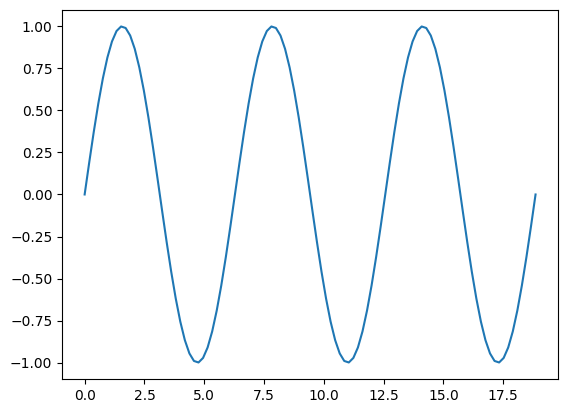

In [123]:
x = np.linspace(0, 6*np.pi, num=100) # 100 puntos entre 0 y 6*pi
y = np.sin(x) # seno de x
plt.plot(x,y) # dibujar x vs y

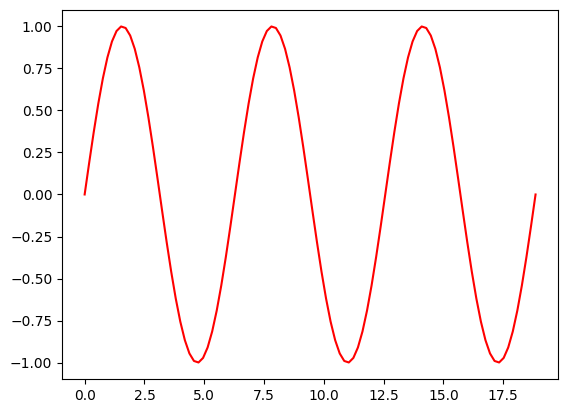

In [124]:
# cambiar el estilo de la línea
plt.plot(x,y, 'r')

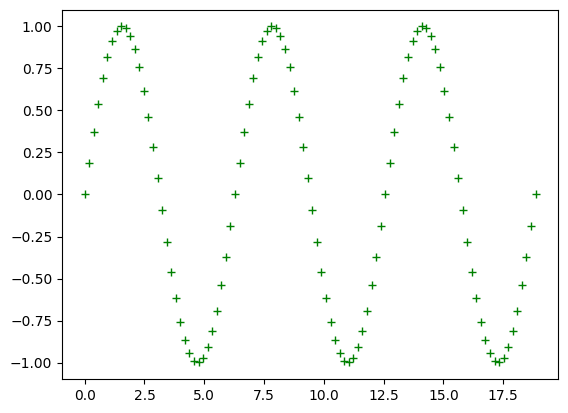

In [125]:
plt.plot(x,y, 'g+')
# + = cruz
# o = círculo
# * = estrella
# . = punto
# - = línea continua
# -- = línea discontinua
# -. = línea con puntos

Se pueden incluir varias gráficas separadas con comas y cada una puede tener su estilo

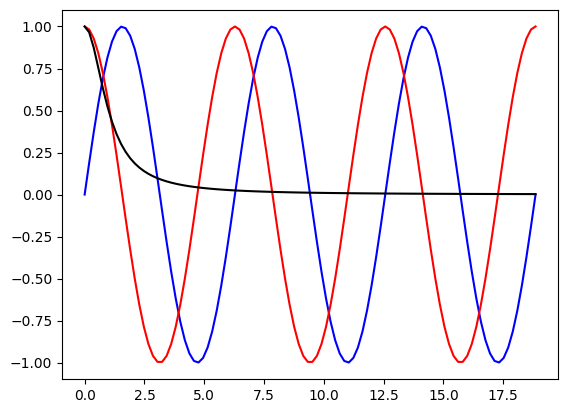

In [126]:
y2 = np.cos(x) #f(x) = cos(x)
y3 = 1 / (x**2 + 1) # f(x) = 1 / (x^2 + 1)
plt.plot(x,y,'b', x, y2, 'r', x, y3, 'k')

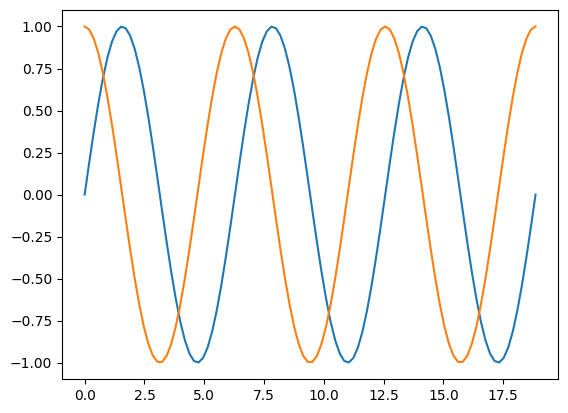

In [127]:
plt.plot(x,y) # OJO! podemos seguir añadiendo gráficas a la misma figura
plt.plot(x,y2)

A la figura se le pueden añadir elementos como una rejilla, títulos, o los nombres de los ejes

Text(0, 0.5, 'sin(x)')

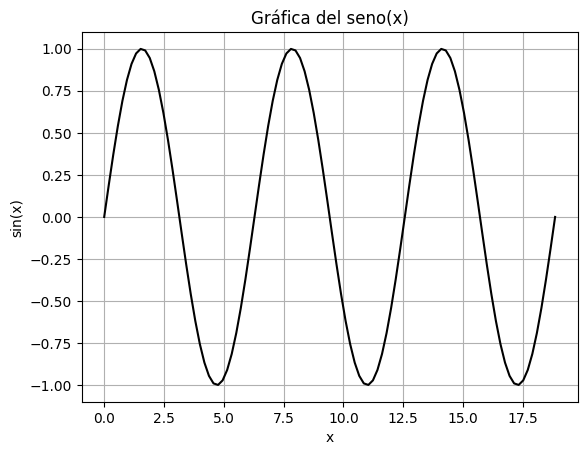

In [128]:
plt.plot(x, y, 'k')
plt.grid()
plt.title('Gráfica del seno(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')

### Gráficos de puntos o de dispersión

Text(0, 0.5, 'precio')

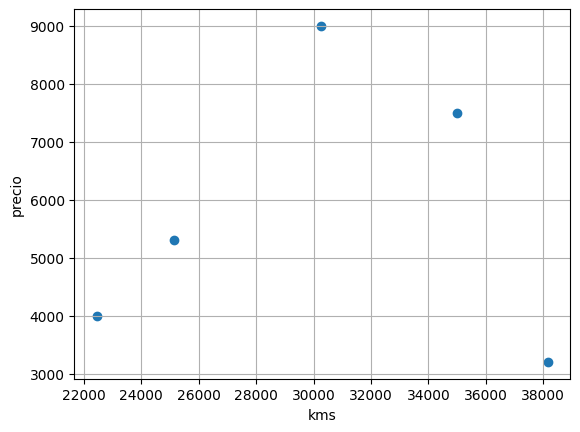

In [136]:
plt.scatter(df['kms'], df['precio'])
plt.grid()
plt.xlabel('kms')
plt.ylabel('precio')

En una misma figura se pueden dibujar varias gráficas a modo de cuadrícula mediante el uso de subplot. La sintaxis de subplot es plt.subplot(n_filas, n_columnas, pos), donde posición se da por filas.

Por ejemplo en una cuadrícula de 2x2 y para dibujar en la primera columna de la segunda fila sería subplot(2,2,3)

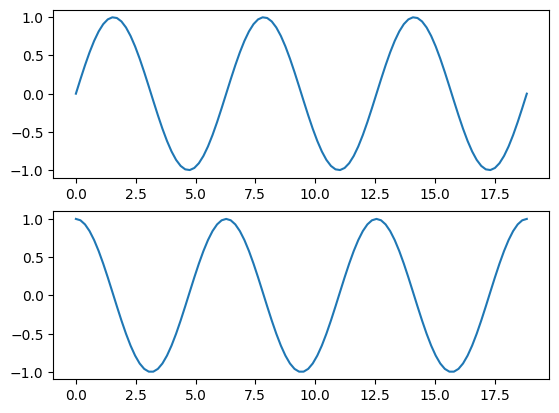

In [137]:
plt.subplot(2,1,1)
plt.plot(x,y)
plt.subplot(2,1,2)
plt.plot(x,y2)

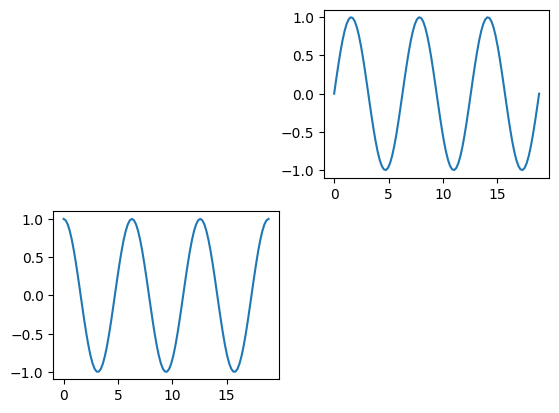

In [139]:
plt.subplot(2,2,2)
plt.plot(x,y)
plt.subplot(2,2,3)
plt.plot(x,y2)

In [132]:
df

,matrícula,marca,modelo,año,kms,precio
0,ABC123,Toyota,Camry,2019,25153,5300
1,XYZ456,Honda,Accord,2018,30278,9000
2,DEF789,Ford,Fusion,2020,22456,4000
3,GHI012,Chevrolet,Malibu,2017,34987,7500
4,JKL345,Nissan,Altima,2016,38163,3200


## Ejercicio

Represantar en un gráfico precio y km y colorear cada punto por marca

In [133]:
# Represantar en un gráfico precio y km y colorear cada punto por marca
marcas = df['marca'].unique() # tambien se puede hacer con un set()
print(marcas)

['Toyota' 'Honda' 'Ford' 'Chevrolet' 'Nissan']


In [134]:
colores = ['r', 'g', 'b', 'k', 'y', 'm', 'c']

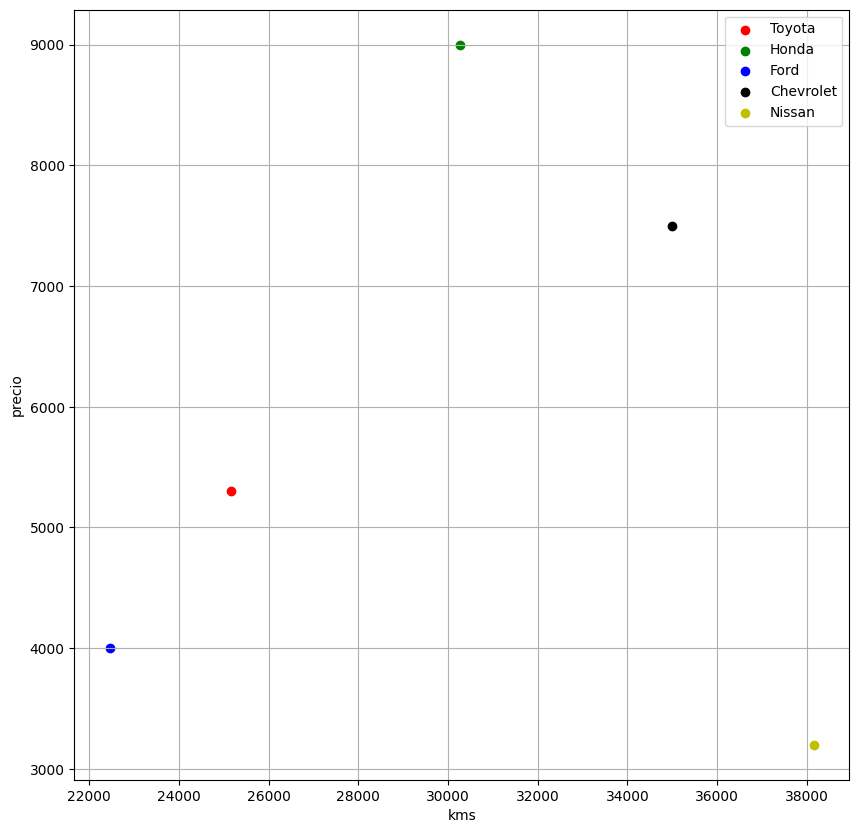

In [135]:
# plot
# Configurar el tamaño de la figura del gráfico
plt.figure(figsize=(10, 10))

# Iterar sobre cada marca de coche
for i, marca in enumerate(marcas):
    # Filtrar el DataFrame para obtener solo los datos de la marca actual
    df_aux = df[df['marca'] == marca]
    
    # Graficar los datos de la marca actual usando scatter plot
    # Se usa un color diferente para cada marca
    plt.scatter(df_aux['kms'], df_aux['precio'], c=colores[i], label=marca)

# Agregar una cuadrícula al gráfico
plt.grid()

# Etiqueta del eje X (kilómetros recorridos)
plt.xlabel('kms')

# Etiqueta del eje Y (precio del vehículo)
plt.ylabel('precio')

# Agregar una leyenda para identificar cada marca en el gráfico
plt.legend()

# Mostrar el gráfico
plt.show()
